In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#print(os.listdir("../input"))

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import math
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv("train.csv", header=0)

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,30.447144,30.478571,30.080000,30.104286,20.230061,88102700
1,2010-01-04,30.490000,30.642857,30.340000,30.572857,20.544939,123432400
2,2010-01-05,30.657143,30.798571,30.464285,30.625713,20.580460,150476200
3,2010-01-06,30.625713,30.747143,30.107143,30.138571,20.253105,138040000
4,2010-01-07,30.250000,30.285715,29.864286,30.082857,20.215658,119282800


In [4]:
test_data = pd.read_csv("test.csv")

In [5]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,115.800003,116.330002,114.760002,116.150002,113.013916,28781900
1,2017-01-04,115.849998,116.510002,115.750000,116.019997,112.887413,21118100
2,2017-01-05,115.919998,116.860001,115.809998,116.610001,113.461502,22193600
3,2017-01-06,116.779999,118.160004,116.470001,117.910004,114.726402,31751900
4,2017-01-09,117.949997,119.430000,117.940002,118.989998,115.777237,33561900


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data_train = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

C:\Users\Srilaasya\AppData\Local\Temp\ipykernel_7020\2263411740.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


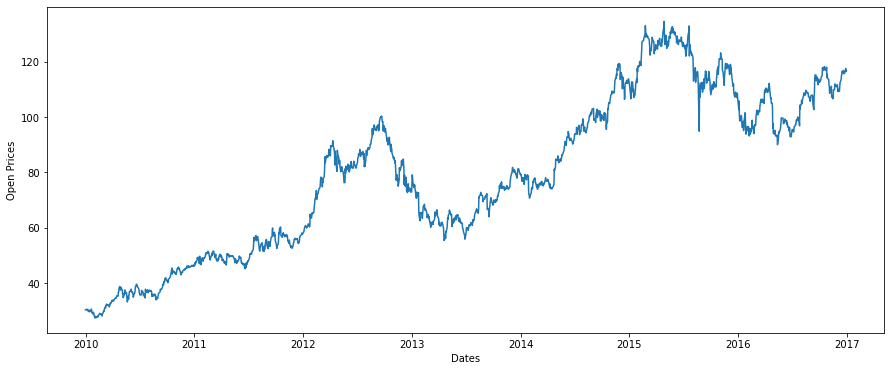

In [7]:
ts = data_train['Open'] 
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(ts)

In [8]:
data_test = pd.read_csv('test.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

C:\Users\Srilaasya\AppData\Local\Temp\ipykernel_7020\2263411740.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


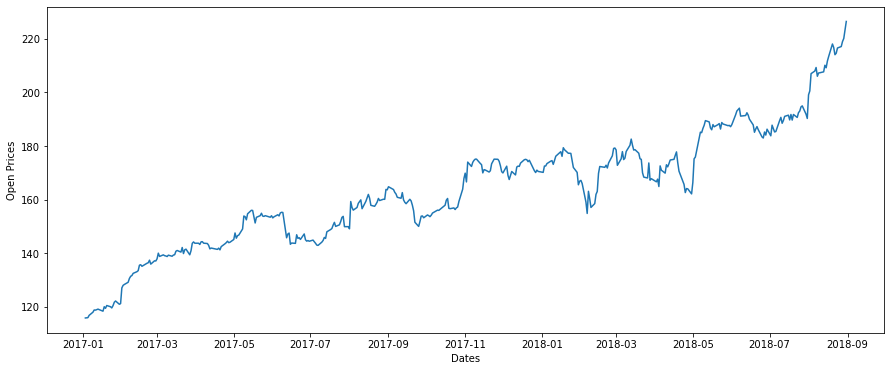

In [9]:
ts = data_test['Open'] 
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(ts)

In [10]:
train = train_data.iloc[:, 1:2].values

In [11]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [12]:
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
54/54 [==============================] - 38s 167ms/step - loss: 0.0292
Epoch 2/100
54/54 [==============================] - 9s 169ms/step - loss: 0.0067
Epoch 3/100
54/54 [==============================] - 8s 151ms/step - loss: 0.0059
Epoch 4/100
54/54 [==============================] - 8s 152ms/step - loss: 0.0059
Epoch 5/100
54/54 [==============================] - 8s 151ms/step - loss: 0.0048
Epoch 6/100
54/54 [==============================] - 9s 164ms/step - loss: 0.0048
Epoch 7/100
54/54 [==============================] - 9s 159ms/step - loss: 0.0051
Epoch 8/100
54/54 [==============================] - 9s 164ms/step - loss: 0.0044
Epoch 9/100
54/54 [==============================] - 9s 157ms/step - loss: 0.0041
Epoch 10/100
54/54 [==============================] - 10s 177ms/step - loss: 0.0048
Epoch 11/100
54/54 [==============================] - 9s 157ms/step - loss: 0.0040
Epoch 12/100
54/54 [==============================] - 9s 162ms/step - loss: 0.0035
Epoch 13/10

54/54 [==============================] - 9s 162ms/step - loss: 0.0012
Epoch 100/100
54/54 [==============================] - 9s 160ms/step - loss: 0.0013


In [15]:
# this will be used later while comparing and visualization
real_stock_price = test_data.iloc[:,1:2].values

In [16]:
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on 60 previous dates  
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
# our test inputs also contains stock open Prices of last 60 dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - 60:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [17]:
test_data.shape

(420, 7)

In [18]:
# same steps as we followed while processing training data
X_test = []
for i in range(60, 480):
    X_test.append(test_inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

14/14 [==============================] - 6s 57ms/step


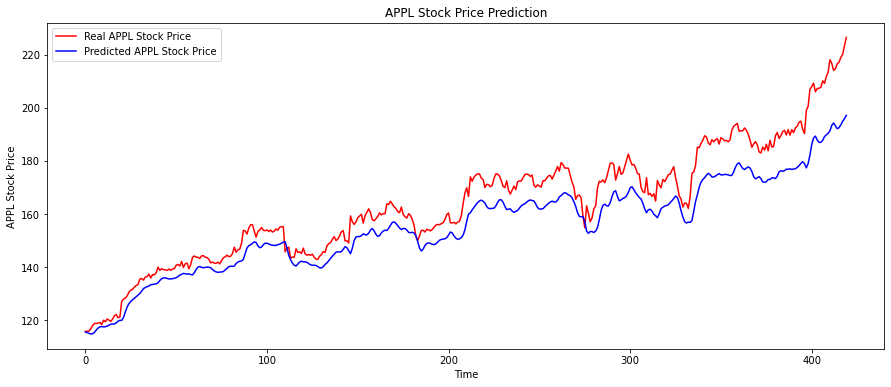

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real APPL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted APPL Stock Price')
plt.title('APPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPL Stock Price')
plt.legend()
plt.show()